# Μέρος 1 – Feature Importance

Όνομα: Kristi Cami AEM:167

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

**Φόρτωση δεδομένων**

In [ ]:
data = pd.read_csv('wine-full.csv')

**Μετατροπή των τιμών white/red/unknown σε 0/1/2**

In [ ]:
data['type'] = data['type'].replace({'white': 0, 'red': 1, 'unknown': 2}).astype('int32')

**Εμφάνιση πρώτων γραμμών για επιβεβαίωση**

In [ ]:
print(data.head())

   type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     

**Διαχωρισμός δεδομένων σε input και target**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

**Χωρισμός input και target**

In [ ]:
X = data.drop(columns=['quality'])
y = data['quality']

**Χωρισμός σε train και test (80-20% με random_state=0)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Αντικατάσταση NaN με μέση τιμή**

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

**Επιβεβαίωση διαστάσεων**

In [ ]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5197, 12)
Test shape: (1300, 12)


**Εκπαίδευση Lasso και Random Forest Regressors**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

**Δημιουργία και εκπαίδευση Lasso Regressor**

In [ ]:
lasso = Lasso(alpha=1.0, random_state=0)
lasso.fit(X_train, y_train)

Lasso(random_state=0)

**Προβλέψεις στο test set**

In [ ]:
y_pred_lasso = lasso.predict(X_test)

**Υπολογισμός μετρικών**

In [ ]:
print("Lasso Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regressor
MSE: 0.7604760345726538
R2 Score: 0.0019991796513336713


**Εκπαίδευση με Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

**Δημιουργία και εκπαίδευση Random Forest Regressor**

In [ ]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**Προβλέψεις στο test set**

In [ ]:
y_pred_rf = rf.predict(X_test)

**Υπολογισμός μετρικών**

In [ ]:
print("Random Forest Regressor")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Regressor
MSE: 0.352971
R2 Score: 0.5367831048650428


**Σύγκριση αποδόσεων**

In [ ]:
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

Lasso MSE: 0.7604760345726538
Random Forest MSE: 0.352971


**Σημαντικότητα χαρακτηριστικών για Lasso**

In [ ]:
lasso_importances = np.abs(lasso.coef_)
lasso_features = X_train.columns

**Ταξινόμηση και επιλογή top 5 για Lasso**

In [ ]:
lasso_sorted_idx = np.argsort(lasso_importances)[::-1]
lasso_top_features = lasso_features[lasso_sorted_idx[:5]]
lasso_top_importances = lasso_importances[lasso_sorted_idx[:5]]

**Σημαντικότητα χαρακτηριστικών για Random Forest**

In [ ]:
rf_importances = rf.feature_importances_
rf_features = X_train.columns

**Ταξινόμηση και επιλογή top 5 για Random Forest**

In [ ]:
rf_sorted_idx = np.argsort(rf_importances)[::-1]
rf_top_features = rf_features[rf_sorted_idx[:5]]
rf_top_importances = rf_importances[rf_sorted_idx[:5]]

**Ραβδόγραμμα για Lasso**

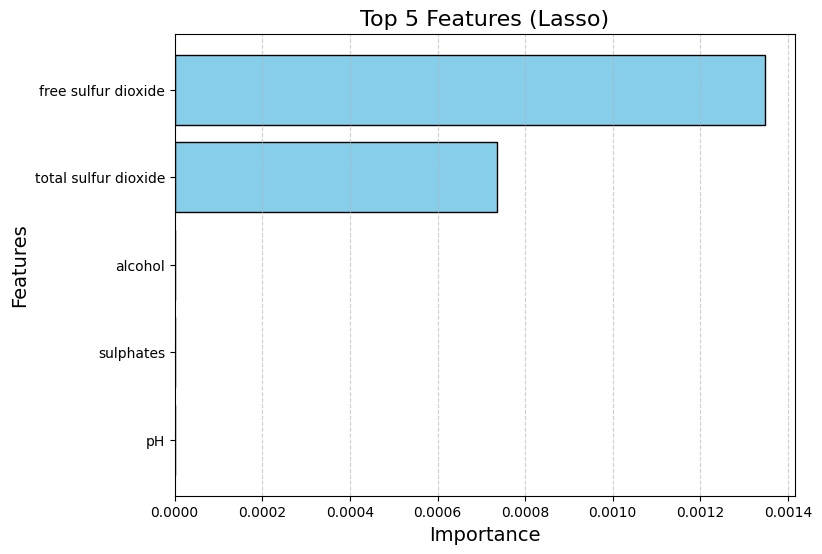

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(lasso_top_features[::-1], lasso_top_importances[::-1], color='skyblue', edgecolor='black')
plt.title("Top 5 Features (Lasso)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Ραβδόγραμμα για Random Forest**

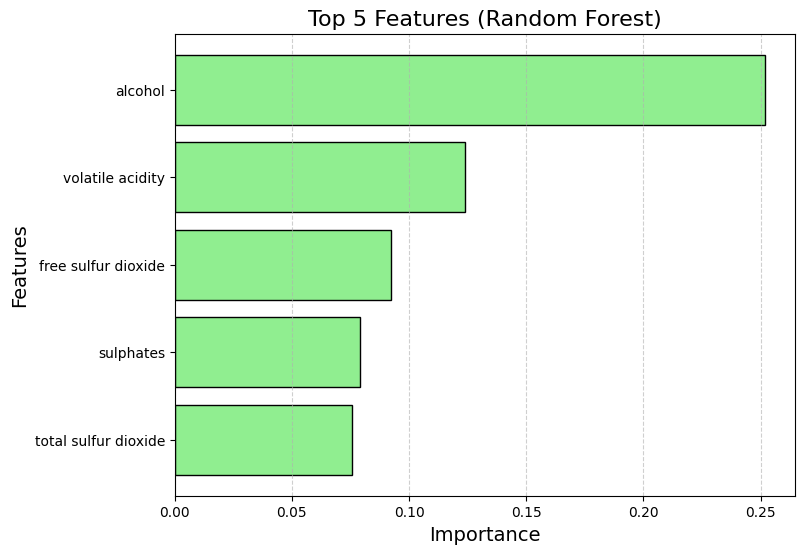

In [ ]:
plt.figure(figsize=(8, 6))
plt.barh(rf_top_features[::-1], rf_top_importances[::-1], color='lightgreen', edgecolor='black')
plt.title("Top 5 Features (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Εκπαίδευση Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Υπολογισμός Permutation Importance στο test set**

In [ ]:
perm_importance = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=0)

**Εξαγωγή των μέσων τιμών και τυπικών αποκλίσεων για κάθε χαρακτηριστικό**

In [ ]:
importance_mean = perm_importance.importances_mean
importance_std = perm_importance.importances_std
features = X_train.columns

**Δημιουργία DataFrame για να εμφανίσουμε τα αποτελέσματα**

In [ ]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Mean Importance': importance_mean,
    'Std Deviation': importance_std
})

**Ταξινόμηση των χαρακτηριστικών κατά σειρά σημαντικότητας**

In [ ]:
importance_df = importance_df.sort_values(by='Mean Importance', ascending=False)

**Εκτύπωση των αποτελεσμάτων**

In [ ]:
print(importance_df)

                 Feature  Mean Importance  Std Deviation
8                density         0.257192       0.019547
11               alcohol         0.212969       0.014482
4         residual sugar         0.205002       0.012543
2       volatile acidity         0.169981       0.011640
0                   type         0.044410       0.008973
6    free sulfur dioxide         0.027761       0.005790
10             sulphates         0.026942       0.005722
9                     pH         0.016367       0.002605
1          fixed acidity         0.014473       0.005590
7   total sulfur dioxide         0.012560       0.005048
5              chlorides         0.002682       0.001498
3            citric acid        -0.000498       0.000887


**Ταξινόμηση των χαρακτηριστικών για permutation_importance**

In [ ]:
top3_permutation = importance_df.nlargest(3, 'Mean Importance')['Feature'].tolist()

**Ταξινόμηση των χαρακτηριστικών για Lasso**

In [ ]:
lasso_top3 = lasso_top_features[:3].tolist()

**Ταξινόμηση των χαρακτηριστικών για Random Forest**

In [ ]:
rf_top3 = rf_top_features[:3].tolist()

**Εμφάνιση των top 3 χαρακτηριστικών από κάθε μέθοδο**

In [ ]:
print("Top 3 Features (Permutation Importance):", top3_permutation)
print("Top 3 Features (Lasso):", lasso_top3)
print("Top 3 Features (Random Forest):", rf_top3)

Top 3 Features (Permutation Importance): ['density', 'alcohol', 'residual sugar']
Top 3 Features (Lasso): ['free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
Top 3 Features (Random Forest): ['alcohol', 'volatile acidity', 'free sulfur dioxide']


**Σύγκριση των αποτελεσμάτων**

In [ ]:
all_top3 = {
    'Permutation Importance': top3_permutation,
    'Lasso': lasso_top3,
    'Random Forest': rf_top3
}

**Δημιουργία πίνακα για σύγκριση**

In [ ]:
import pandas as pd
comparison_df = pd.DataFrame(dict([(key, pd.Series(value)) for key, value in all_top3.items()]))

print("\nComparison of Top 3 Features Across Methods:")
print(comparison_df)


Comparison of Top 3 Features Across Methods:
  Permutation Importance                 Lasso        Random Forest
0                density   free sulfur dioxide              alcohol
1                alcohol  total sulfur dioxide     volatile acidity
2         residual sugar               alcohol  free sulfur dioxide


# Μέρος 2 - Dimensionality Reduction , KNN

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

**Φόρτωση MNIST**

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

**Δημιουργία πλοτ 5 τυχαίων ψηφίων από κάθε κλάση**

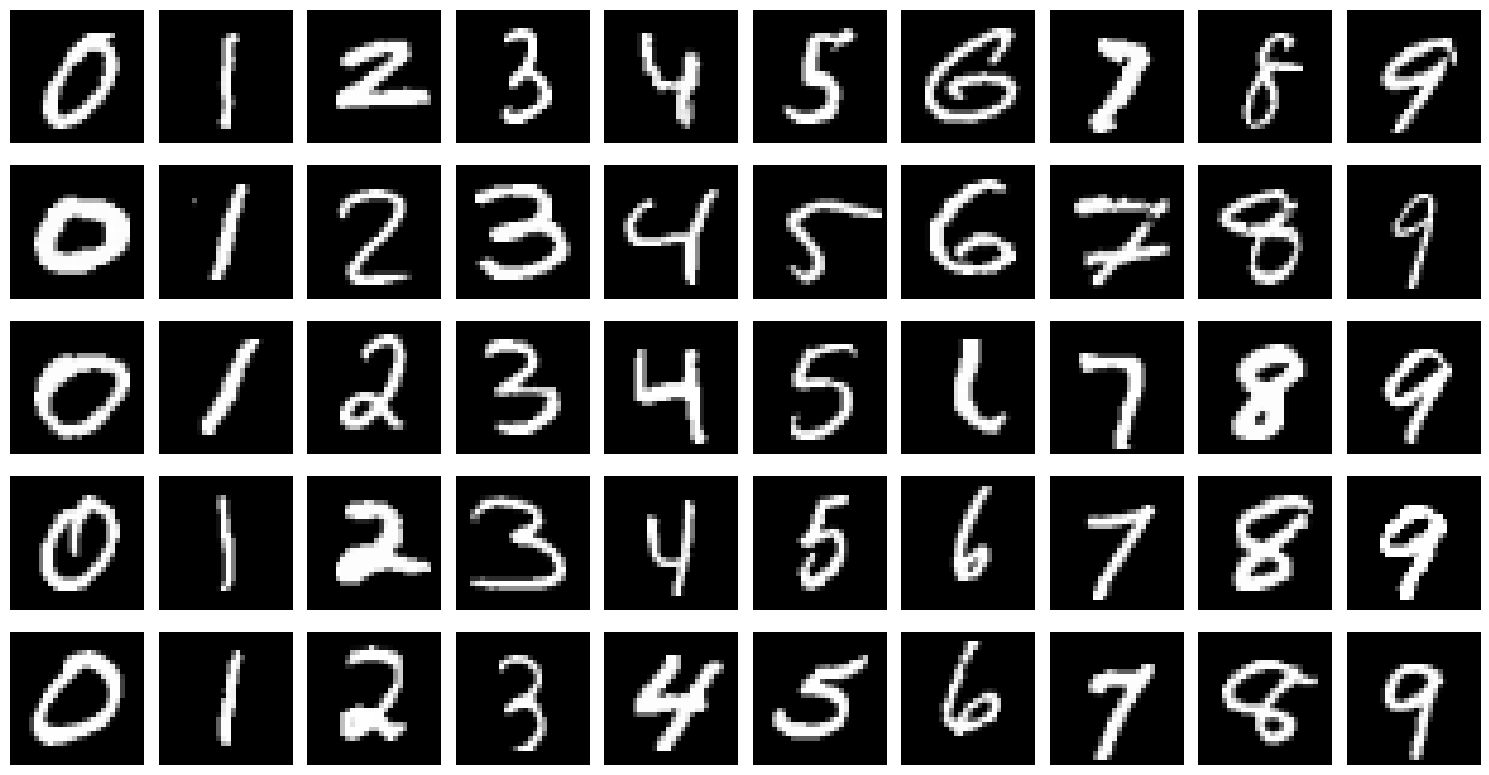

In [ ]:
fig, axes = plt.subplots(5, 10, figsize=(15, 8))
for i in range(10):  # Για κάθε κλάση (0-9)
    idx = np.random.choice(np.where(y == i)[0], 5, replace=False)
    for j, ax in enumerate(axes[:, i]):
        ax.imshow(X.iloc[idx[j]].values.reshape(28, 28), cmap='gray')
        ax.axis('off')

plt.tight_layout()
plt.show()

**Κανονικοποίηση δεδομένων**

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Η κανονικοποίηση με MinMaxScaler μετατρέπει τα δεδομένα στο διάστημα [0, 1], κάτι που είναι ιδανικό για τον KNN, καθώς η ακρίβεια του εξαρτάται από την κλίμακα των χαρακτηριστικών (βασίζεται σε αποστάσεις).

**Εκπαίδευση KNN με διάφορες τιμές του k**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Διαχωρισμός σε train-test (80%-20%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

**Τιμές k**

In [ ]:
k_values = [5, 15, 51, int(np.sqrt(60000))]
accuracies = []

**Εκπαίδευση και αξιολόγηση για κάθε k**

In [ ]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")

K=5, Accuracy=0.9694
K=15, Accuracy=0.9637
K=51, Accuracy=0.9483
K=244, Accuracy=0.9175


**Γραφική απεικόνιση K vs Accuracy**

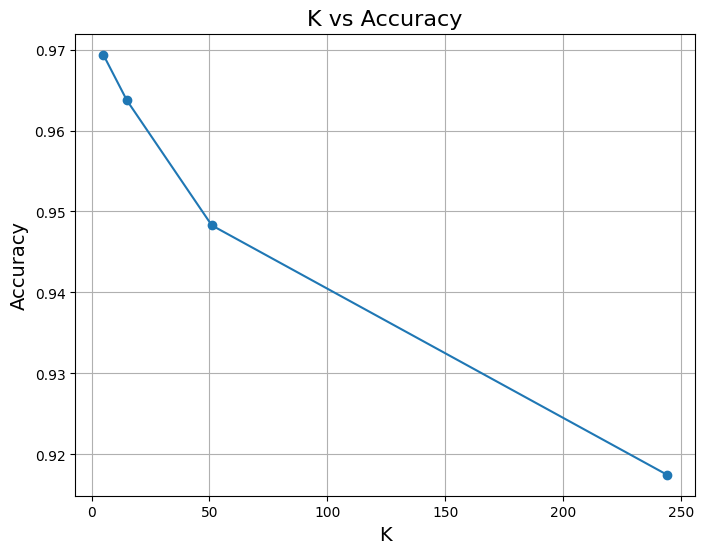

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("K vs Accuracy", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.grid()
plt.show()

**Είναι όλα τα pixels σημαντικά;**

Όχι, δεν είναι όλα τα pixels σημαντικά. Τα pixels που βρίσκονται στις γωνίες της εικόνας είναι πιθανώς μηδενικά (κενά) και δεν προσφέρουν πληροφορία. Ο ταξινομητής βασίζεται κυρίως στα pixels που σχηματίζουν τα ψηφία.

**Μείωση Διαστασιμότητας με PCA**

In [ ]:
from sklearn.decomposition import PCA

**Εφαρμογή PCA (n_components=300)**

In [ ]:
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Εκπαίδευση KNN με τα δεδομένα μετά το PCA**

In [ ]:
accuracies_pca = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies_pca.append(acc)
    print(f"PCA -> K={k}, Accuracy={acc:.4f}")

PCA -> K=5, Accuracy=0.9701
PCA -> K=15, Accuracy=0.9641
PCA -> K=51, Accuracy=0.9486
PCA -> K=244, Accuracy=0.9190


**Σύγκριση K vs Accuracy (με PCA)**

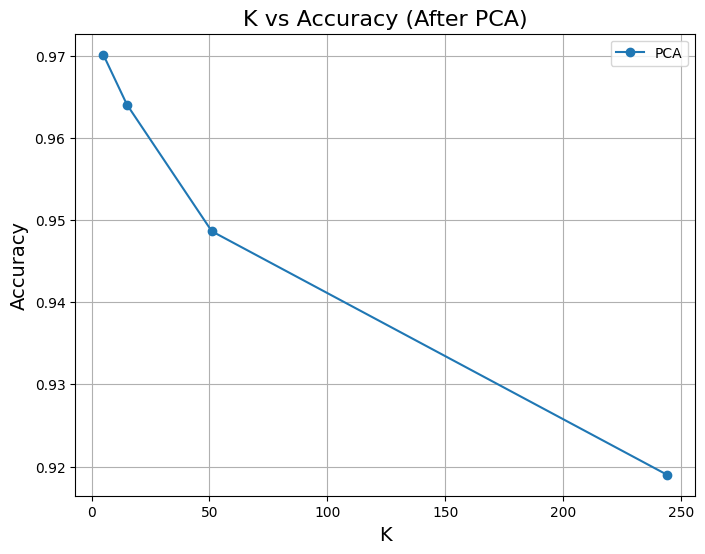

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies_pca, marker='o', label="PCA")
plt.title("K vs Accuracy (After PCA)", fontsize=16)
plt.xlabel("K", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()
plt.grid()
plt.show()

**Αν εφαρμόζαμε fit_transform ξεχωριστά;**

Αν εφαρμόζαμε fit_transform ξεχωριστά στο train και test set, θα υπήρχαν διαφορετικές βάσεις μετασχηματισμού, κάτι που θα οδηγούσε σε λανθασμένα αποτελέσματα.

**Χρόνος και Ακρίβεια μετά το PCA**


*   Το PCA μειώνει τον χρόνο εκπαίδευσης και πρόβλεψης επειδή μειώνονται οι διαστάσεις.

*   Η εφαρμογή του PCA δεν επηρέασε αρνητικά την ακρίβεια. Αντιθέτως, υπήρξε πολύ μικρή βελτίωση σε ορισμένες περιπτώσεις.

**Μείωση με LDA και Οπτικοποίηση**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

**Εφαρμογή LDA (n_components=2)**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

**Εκπαίδευση KNN με τα δεδομένα LDA**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_lda, y_train)
y_pred_lda = knn.predict(X_test_lda)

**Εμφάνιση classification_report**

In [ ]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1387
           1       0.87      0.93      0.90      1580
           2       0.40      0.46      0.43      1443
           3       0.31      0.34      0.33      1435
           4       0.46      0.61      0.52      1350
           5       0.41      0.43      0.42      1231
           6       0.58      0.51      0.54      1387
           7       0.58      0.55      0.57      1458
           8       0.28      0.19      0.22      1368
           9       0.43      0.32      0.37      1361

    accuracy                           0.52     14000
   macro avg       0.51      0.52      0.51     14000
weighted avg       0.52      0.52      0.52     14000



**2D scatter plot με τα δεδομένα LDA**

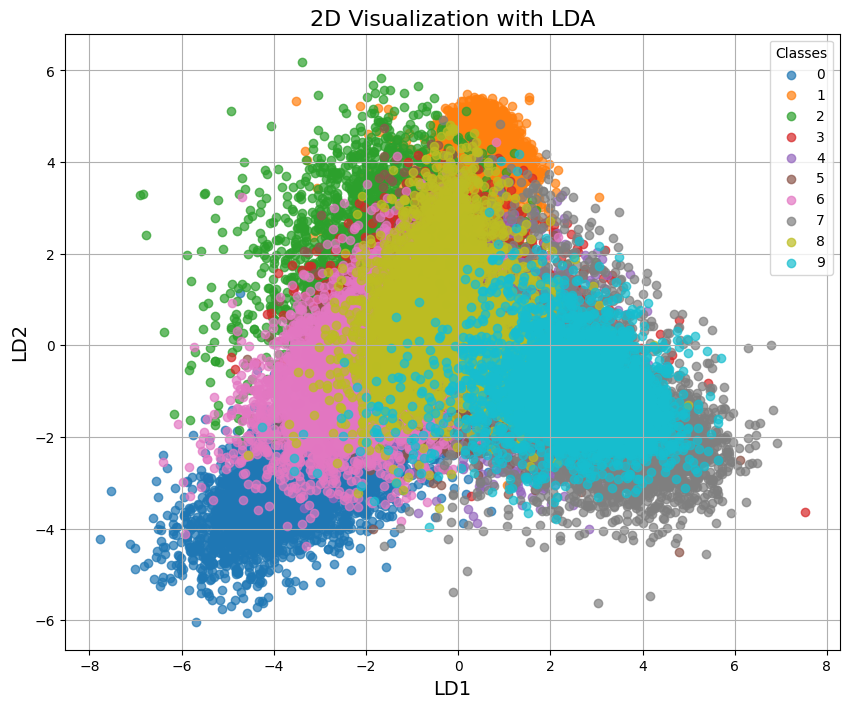

In [ ]:
plt.figure(figsize=(10, 8))
for i in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], label=str(i), alpha=0.7)

plt.title("2D Visualization with LDA", fontsize=16)
plt.xlabel("LD1", fontsize=14)
plt.ylabel("LD2", fontsize=14)
plt.legend(title="Classes")
plt.grid()
plt.show()

Το LDA μείωσε τα χαρακτηριστικά σε 2 διαστάσεις (LD1, LD2), μεγιστοποιώντας τη διάκριση μεταξύ των κλάσεων. Παρατηρούμε ότι ο διαχωρισμός των κλάσεων είναι ικανοποιητικός, αλλά υπάρχουν κάποιες επικαλύψεις, ειδικά για ψηφία με παρόμοια δομή, όπως το 3, το 5, και το 8.